Análise de Dados - Limpeza e Tratamento de Dados

In [23]:
import pandas as pd
import seaborn as srn
import statistics as sts
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importar dados
dataset = pd.read_csv("Churn.csv", sep=";")

# Visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# Tamanho
dataset.shape

(999, 12)

In [5]:
# Primeiro problema é dar nomes as colunas
dataset.columns = ["Id", "Score", "Estado", "Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                  "Ativo","Salario","Saiu"]

In [6]:
# Visualizar os primeiros registros
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
# Explorar dados categoricos
# Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='Genero'>

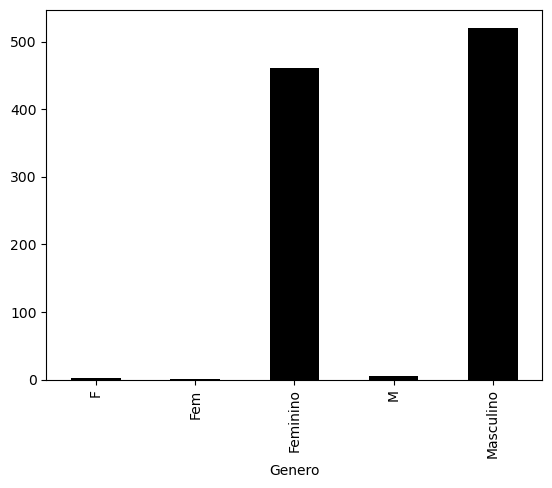

In [32]:
agrupado.plot.bar(color = 'black')

In [9]:
# Genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='Genero'>

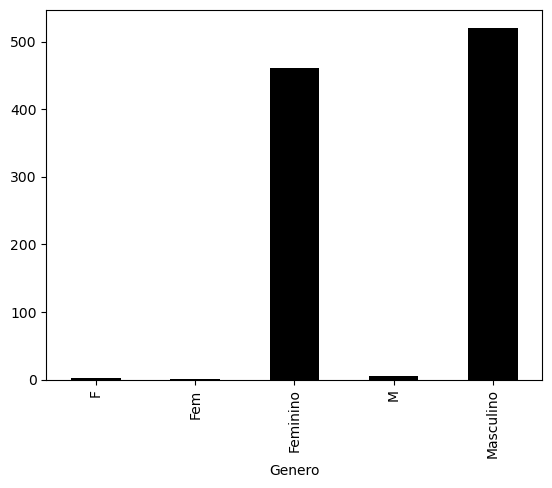

In [33]:
agrupado.plot.bar(color = 'black')

In [34]:
# Explorar colunas númericas

# Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

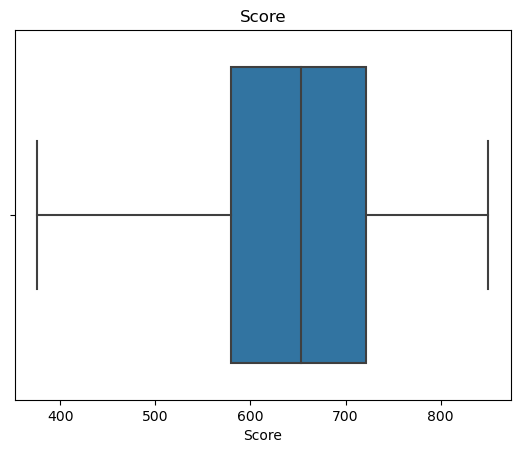

In [35]:
srn.boxplot(dataset['Score']).set_title('Score')

Text(0.5, 1.0, 'Score')

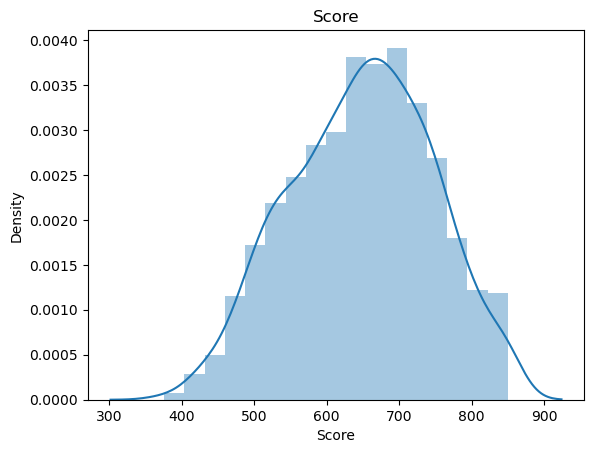

In [36]:
srn.distplot(dataset['Score']).set_title('Score')

In [37]:
# Explorar colunas númericas

# Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

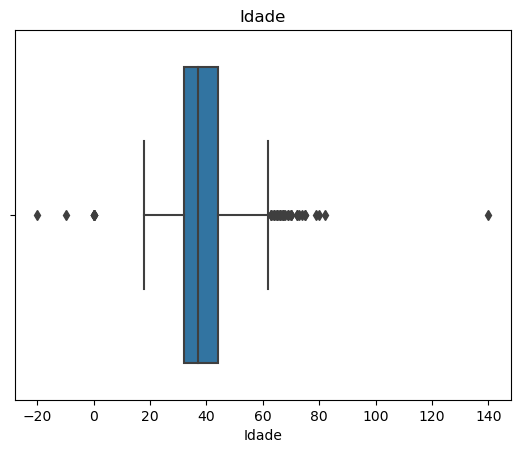

In [38]:
srn.boxplot(dataset['Idade']).set_title('Idade')

Text(0.5, 1.0, 'Score')

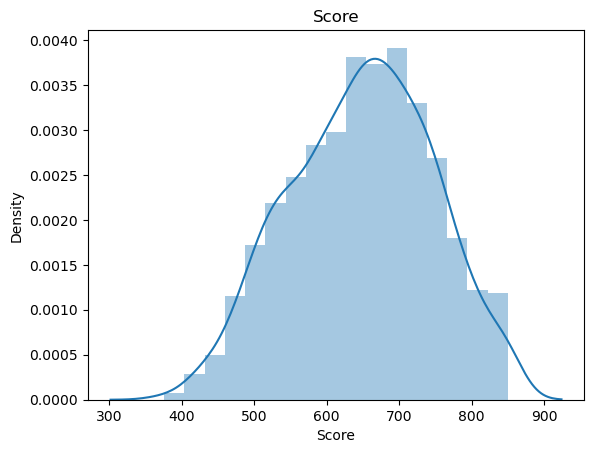

In [39]:
srn.distplot(dataset['Score']).set_title('Score')

In [40]:
# Explorar colunas númericas

# Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

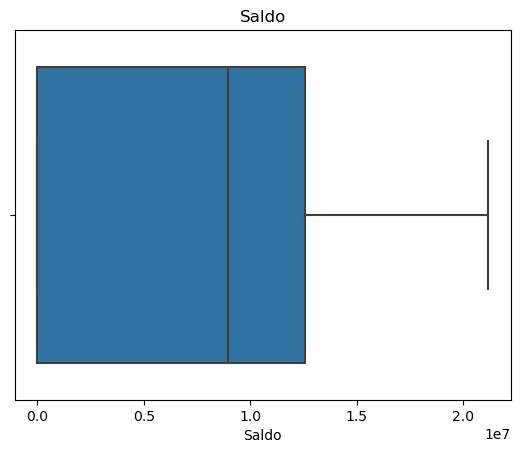

In [41]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

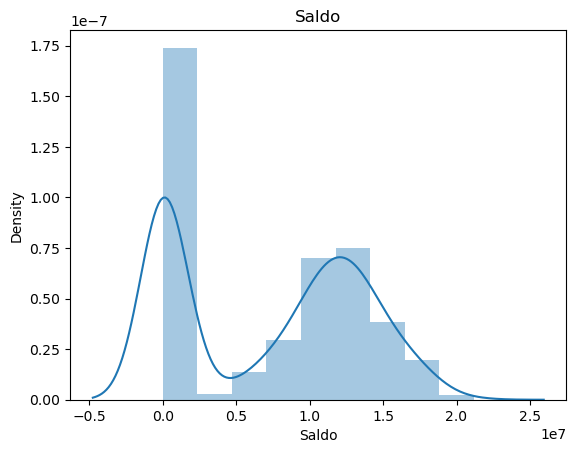

In [42]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [44]:
# Explorar colunas númericas

# Salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

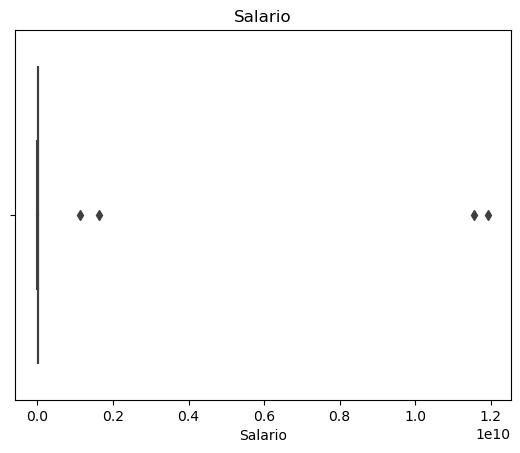

In [45]:
srn.boxplot(dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

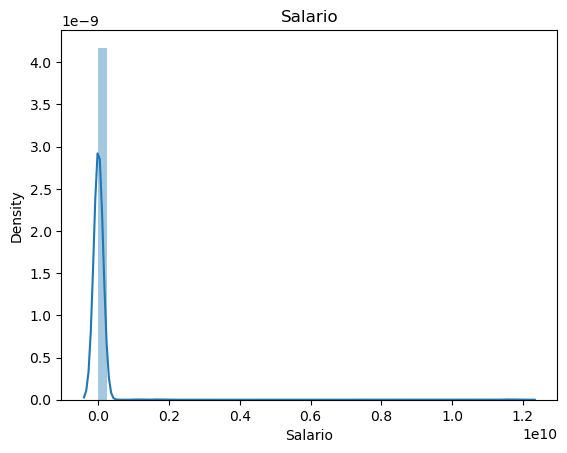

In [43]:
srn.distplot(dataset['Salario']).set_title('Salario')

In [47]:
# Contamos valores NaN

# Genero e Salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [48]:
# Salarios

# Remover NaN e substituir pela mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [49]:
# Calculando a mediana de salario
mediana = sts.median(dataset['Salario'])
mediana

70518.0

In [50]:
# Salarios

# Substituindos os valores NaN pela mediana calculada
dataset['Salario'].fillna(mediana, inplace=True)

In [52]:
# Verifica se os valores NaN foram substituidos
dataset['Salario'].isnull().sum()

0

In [56]:
# Genero, falta de padronização e NaN
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [58]:
# Verificando o total de NaN em genero
dataset['Genero'].isnull().sum()

8

In [61]:
# Preenche os NaN com o moda (Masculino)
dataset['Genero'].fillna('Masculino', inplace=True)

In [62]:
# Verificando o total de NaN em genero após tratamento
dataset['Genero'].isnull().sum()

0

In [68]:
# Padronização de acordo com o dominio
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'] .isin(['Fem','F']), 'Genero'] = "Feminino"

# Visualiza os resultados
agrupado = dataset.groupby(["Genero"]).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [69]:
# Verifica idades fora do dominio
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [73]:
# Idades

# Visualiza as idades menor que 0 e maior que 90
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 90)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [74]:
# Idade

# Calcula e mostra a mediana de idade
mediana = sts.median(dataset['Idade'])
mediana

37

In [77]:
# Idade

# Substitui a idades que estão fora pela mediana
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 90), 'Idade'] = mediana

In [78]:
# Idades

# Verifica as idades que são menor que 0 e maior que 90 após tratamento de dados
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 90)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [79]:
# Verificando dados duplicados atraves do ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [80]:
# Excluindo dados duplicados pelo ID
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

# Verificando dados duplicados atraves do ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [81]:
# Verificando estados fora do dominio
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [83]:
# Atribuimos a moda para tratar os estados fora do dominio no caso seria o (RS)
dataset.loc[dataset['Estado'] .isin(['RP','SP','TD']), 'Estado'] = "RS"

# Visualizando os dados após tratamento dos dominios
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [84]:
# Outliers em salario, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [85]:
# Definir padrão como maior que 2 desvios padrão

# Checando se algum salario atende o critério
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [86]:
# Calculo de mediana do salario
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [87]:
# Atribuindo a mediana aos salarios fora do desvio padrão que foi considerado
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

# Checando se algum salario atende o critério após o tratamento de dados
dataset.loc[dataset['Salario'] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [88]:
# Mostra os primeiros registros
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [90]:
dataset.shape

(998, 12)